In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import string
%matplotlib inline

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


## Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
chirps = df["Chirps/Second"]
temp = df[["Ground Temperature"]]
regr1 = linear_model.LinearRegression()
regr1.fit(temp, chirps)


/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2 = 0.692294652915
predicted chirp speed at 95 degrees = [ 19.74428913]
At 18 chirps/second, one would expect a ground temperature of 87 degrees


array([ 18.12029128])

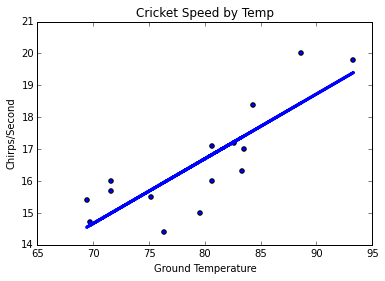

In [3]:
df.plot(kind="scatter", x="Ground Temperature", y="Chirps/Second", title="Cricket Speed by Temp")
plt.plot(temp, regr1.predict(temp), color='blue', linewidth=3)
print("R^2 =", regr1.score(temp, chirps))
print("predicted chirp speed at 95 degrees =", regr1.predict([95]))
print("At 18 chirps/second, one would expect a ground temperature of 87 degrees")
regr1.predict(87)

At 18 chirps/second, one would expect a ground temperature of 87 degrees

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [4]:
brb = pd.read_fwf("linear-regression/brain_body.txt")
brb.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
brain = brb["Brain"]
body = brb[["Body"]]
regr2 = linear_model.LinearRegression()
regr2.fit(body, brain)


/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficient = [ 0.90291295] Y-intercept = -56.8555454286
R^2 = 0.872662084304


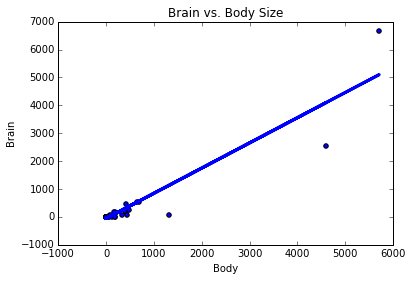

In [6]:
brb.plot(kind="scatter", x="Body", y="Brain", title="Brain vs. Body Size")
plt.plot(body, regr2.predict(body), color='blue', linewidth=3)
print("Coefficient =", regr2.coef_, "Y-intercept =", regr2.intercept_)
print("R^2 =", regr2.score(body, brain))

#### Note: 

The assignment requests: Chart the original data and the equation on the chart.
This chart is the original data, although there are some obvious outliers, including the extra large creatures that skew the results, as well as a few creatures whose BRAIN size is larger than their BODY size

## Salary Discrimination¶
### Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.

Find the selection of columns with the best R2 score.

Report whether sex is a factor in salary.


In [23]:
salary = pd.read_fwf("linear-regression/salary.txt", names=["Sex", "Rank", "Year", "Degree", "YSDeg", "Salary"])
salary.head()

,Sex,Rank,Year,Degree,YSDeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [111]:
pay = salary["Salary"]
ysdeg = salary["YSDeg"]
degree = salary["Degree"]
year = salary["Year"]
rank = salary["Rank"]
sex = salary[["Sex"]]
regr3 = linear_model.LinearRegression()
regr3.fit(sex, pay)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
print("Sex-to-Rank: R^2 =", regr3.score(sex, rank))
print("Sex-to-Year: R^2 =", regr3.score(sex, year))
print("Sex-to-Degree: R^2 =", regr3.score(sex, degree))
print("Sex-to-YSDeg: R^2 =", regr3.score(sex, ysdeg))
print("Sex-to-Salary: R^2 =", regr3.score(sex, pay))

Sex-to-Rank: R^2 = -779422623.477
Sex-to-Year: R^2 = -19098071.1727
Sex-to-Degree: R^2 = -2511767108.58
Sex-to-YSDeg: R^2 = -5539775.88669
Sex-to-Salary: R^2 = 0.0638989258329


In [59]:
print("Rank-to-Year: R^2 =", regr3.score(salary[["Rank"]], year))
print("Rank-to-Degree: R^2 =", regr3.score(salary[["Rank"]], degree))
print("Rank-to-YSDeg: R^2 =", regr3.score(salary[["Rank"]], ysdeg))
print("Rank-to-Salary: R^2 =", regr3.score(salary[["Rank"]], pay))

Rank-to-Year: R^2 = -11021992.6974
Rank-to-Degree: R^2 = -1449770639.0
Rank-to-YSDeg: R^2 = -3196667.41381
Rank-to-Salary: R^2 = -2.09785617657


In [60]:
print("Year-to-Degree: R^2 =", regr3.score(salary[["Year"]], degree))
print("Year-to-YSDeg: R^2 =", regr3.score(salary[["Year"]], ysdeg))
print("Year-to-Salary: R^2 =", regr3.score(salary[["Year"]], pay))


Year-to-Degree: R^2 = -1466366075.0
Year-to-YSDeg: R^2 = -3240731.33888
Year-to-Salary: R^2 = -30.9085469296


In [61]:
print("Degree-to-YSDeg: R^2 =", regr3.score(salary[["Degree"]], ysdeg))
print("Degree-to-Salary: R^2 =", regr3.score(salary[["Degree"]], pay))
print("YSDeg-to-Salary: R^2 =", regr3.score(salary[["YSDeg"]], pay))

Degree-to-YSDeg: R^2 = -4962853.97485
Degree-to-Salary: R^2 = -0.0837435527714
YSDeg-to-Salary: R^2 = -122.624860571


Coefficient = [-3339.64661654] Y-intercept = 24696.7894737


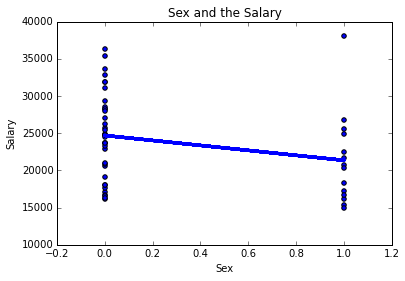

In [103]:
salary.plot(kind="scatter", x="Sex", y="Salary", title="Sex and the Salary")
plt.plot(salary.Sex, regr3.predict(sex), color="blue", linewidth=3)
print("Coefficient =", regr3.coef_, "Y-intercept =", regr3.intercept_)


The data indicates that females earn, on average, $3339 less than their male counterparts. However, the University's highest paid employee is a female. That point is a clear outlier. Let's see what it looks without that person.

In [64]:
salary.head()

,Sex,Rank,Year,Degree,YSDeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [107]:
salary2 = salary.sort(["Salary"], ascending=False)[1:]
salary2

,Sex,Rank,Year,Degree,YSDeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
4,0,3,19,0,30,33696
9,0,3,13,0,31,32850
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
16,0,3,13,1,20,31114
15,0,3,7,1,15,29342
5,0,3,16,1,21,28516
2,0,3,10,1,23,28200


In [108]:
pay = salary2["Salary"]
ysdeg = salary2["YSDeg"]
degree = salary2["Degree"]
year = salary2["Year"]
rank = salary2["Rank"]
sex = salary2[["Sex"]]
regr4 = linear_model.LinearRegression()
regr4.fit(sex, pay)


/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
print("Sex-to-Salary: R^2 =", regr4.score(sex, pay))

Sex-to-Salary: R^2 = 0.131144255747


Coefficient = [-4623.32793522] Y-intercept = 24696.7894737


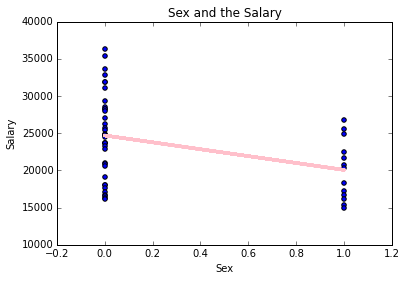

In [110]:
salary2.plot(kind="scatter", x="Sex", y="Salary", title="Sex and the Salary")
plt.plot(salary2.Sex, regr4.predict(sex), color="pink", linewidth=3)
print("Coefficient =", regr4.coef_, "Y-intercept =", regr4.intercept_)


Oddly, that increased the R^2 score. The new "wage gap" is $4,623.